In [9]:
# Input bags
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

# whether need standardized
scale = False

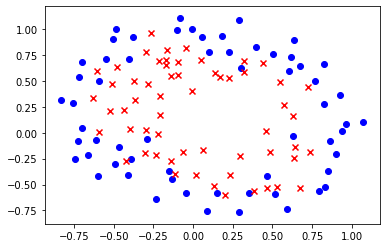

In [10]:
# Input data
path='C:\\Users\\ellen\\Documents\\2019\\Python\\python入门笔记（强烈推荐）\\线性回归及非线性回归\\逻辑回归\\逻辑回归\\LR-testSet2.txt'

data=pd.read_csv(path,header=None)
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
# Split Data
def plot():
    x00=[]
    x10=[]
    x01=[]
    x11=[]
    
    for i in range(len(x)):
        if y[i] == 0:
            x00.append(x.iloc[i,0])
            x10.append(x.iloc[i,1])
        else:
            x01.append(x.iloc[i,0])
            x11.append(x.iloc[i,1])
#Plot
    Scatter0 = plt.scatter(x00,x10,c='b',marker='o')
    Scatter1 = plt.scatter(x01,x11,c='r',marker='x')
    
plot()
plt.show()

In [20]:
# Define Function

def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def cost(xMat,yMat,ws):
    left = np.multiply(yMat,np.log(sigmoid(xMat * ws)))
    right = np.multiply(1-yMat,np.log(1-sigmoid(xMat * ws)))
    return np.sum(left+right)/-len(xMat)

def GradientDescent(xArr,yArr):
    
    if scale == True:
        xArr=preprocessing.scale(xArr)
    xMat= np.mat(xArr)
    yMat= np.mat(yArr)
    
    lr=0.03
    epochs=50000
    costlist=[]
    m,n=np.shape(xMat)
    
    #set ws
    ws= np.mat(np.ones((n,1)))
    
    for i in range(epochs + 1):
               
        h=sigmoid(xMat * ws)
        ws_grad = xMat.T * (h-yMat)/m
        
        ws=ws- lr* ws_grad
        
        if i % 50==0:
            costlist.append(cost(xArr,yArr,ws))
    return ws, costlist

In [32]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
y = y[:,np.newaxis]
# X = np.concatenate((np.ones((118,1)),x),axis=1)

In [36]:
#Input function
poly_reg=PolynomialFeatures(degree=3)

x_poly=poly_reg.fit_transform(x)


In [37]:
ws,costlist=GradientDescent(x_poly,y)
print(ws)

[[ 4.16787292]
 [ 2.72213524]
 [ 4.55120018]
 [-9.76109006]
 [-5.34880198]
 [-8.51458023]
 [-0.55950401]
 [-1.55418165]
 [-0.75929829]
 [-2.88573877]]


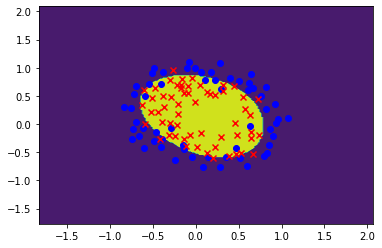

In [43]:
# Plot

# Min, Max
x_min,x_max=x.iloc[:,0].min()-1,x.iloc[:,0].max()+1
y_min,y_max=x.iloc[:,1].min()-1,x.iloc[:,1].max()+1

# Generate Grid
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),
                  np.arange(y_min,y_max,0.02))

z = sigmoid(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]).dot(np.array(ws)))

for i in range(len(z)):
    if z[i] > 0.5:
        z[i] = 1
    else:
        z[i] = 0
z = z.reshape(xx.shape)

# 等高线图
cs = plt.contourf(xx, yy, z)
plot() 
plt.show()

In [53]:
# Predict
def predict(x_data, ws):
#     if scale == True:
#         x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x >= 0.5 else 0 for x in sigmoid(xMat*ws)]

predictions = predict(x_poly, ws)

print(classification_report(y_data, predictions))

array([[-239.2111783]])

In [2]:
cd

C:\Users\ellen
